In [372]:
import pandas as pd
import numpy as np

In [373]:
data = pd.read_csv('predicted_data.csv')

In [374]:
data = data.drop('Unnamed: 0', 1)
data = data.drop('index', 1)
data.set_index(['GAME_DATE', 'HOME', 'AWAY'])


,,,Results,Odds1,Odds2,Score,prediction
GAME_DATE,HOME,AWAY,,,,,
2017-03-11,LAC,PHI,1.0,1.06,11.06,112:100,0.756017
2015-12-10,CHI,LAC,1.0,2.03,1.84,83:80,0.405307
2010-02-18,CLE,DEN,0.0,1.33,3.44,116:118,0.766933
2011-02-10,BOS,LAL,0.0,1.74,2.14,86:92,0.486568
2012-03-23,ATL,BKN,1.0,1.31,3.58,93:84,0.535724
...,...,...,...,...,...,...,...
2012-02-20,UTA,SAS,0.0,2.19,1.71,102:106,0.396541
2018-03-01,SAC,BKN,1.0,2.19,1.72,116:111,0.613979
2013-01-11,NYK,CHI,0.0,1.55,2.54,101:108,0.685122


In [375]:
data['odds1_true'] = 1/ pd.to_numeric(data['Odds1'],errors='coerce')
data['odds2_true'] = 1/ pd.to_numeric(data['Odds2'], errors='coerce')
data['odds_total'] = data['odds1_true'] + data['odds2_true']
data['pred_away'] = 1 - pd.to_numeric(data['prediction'], errors='coerce')
data.rename(columns={'prediction': 'pred_home'}, inplace=True)
data

,Results,GAME_DATE,HOME,AWAY,Odds1,Odds2,Score,pred_home,odds1_true,odds2_true,odds_total,pred_away
0,1.0,2017-03-11,LAC,PHI,1.06,11.06,112:100,0.756017,0.943396,0.090416,1.033812,0.243983
1,1.0,2015-12-10,CHI,LAC,2.03,1.84,83:80,0.405307,0.492611,0.543478,1.036089,0.594693
2,0.0,2010-02-18,CLE,DEN,1.33,3.44,116:118,0.766933,0.751880,0.290698,1.042577,0.233067
3,0.0,2011-02-10,BOS,LAL,1.74,2.14,86:92,0.486568,0.574713,0.467290,1.042002,0.513432
4,1.0,2012-03-23,ATL,BKN,1.31,3.58,93:84,0.535724,0.763359,0.279330,1.042688,0.464276
...,...,...,...,...,...,...,...,...,...,...,...,...
2846,0.0,2012-02-20,UTA,SAS,2.19,1.71,102:106,0.396541,0.456621,0.584795,1.041416,0.603459
2847,1.0,2018-03-01,SAC,BKN,2.19,1.72,116:111,0.613979,0.456621,0.581395,1.038016,0.386021
2848,0.0,2013-01-11,NYK,CHI,1.55,2.54,101:108,0.685122,0.645161,0.393701,1.038862,0.314878
2849,1.0,2014-04-02,SAC,LAL,1.28,3.94,107:102,0.723533,0.781250,0.253807,1.035057,0.276467


In [376]:
cols = list(data.columns.values)
cols

['Results',
 'GAME_DATE',
 'HOME',
 'AWAY',
 'Odds1',
 'Odds2',
 'Score',
 'pred_home',
 'odds1_true',
 'odds2_true',
 'odds_total',
 'pred_away']

In [377]:
data = data[[
 'GAME_DATE',
 'HOME',
 'AWAY','Score',
 'Odds1',
 'Odds2',
 'odds_total',
 'odds1_true',
 'odds2_true',
 'pred_home',
 'pred_away',
    'Results']]
data.set_index(['GAME_DATE', 'HOME', 'AWAY'], inplace=True)
data

,,,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,pred_away,Results
GAME_DATE,HOME,AWAY,,,,,,,,,
2017-03-11,LAC,PHI,112:100,1.06,11.06,1.033812,0.943396,0.090416,0.756017,0.243983,1.0
2015-12-10,CHI,LAC,83:80,2.03,1.84,1.036089,0.492611,0.543478,0.405307,0.594693,1.0
2010-02-18,CLE,DEN,116:118,1.33,3.44,1.042577,0.751880,0.290698,0.766933,0.233067,0.0
2011-02-10,BOS,LAL,86:92,1.74,2.14,1.042002,0.574713,0.467290,0.486568,0.513432,0.0
2012-03-23,ATL,BKN,93:84,1.31,3.58,1.042688,0.763359,0.279330,0.535724,0.464276,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2012-02-20,UTA,SAS,102:106,2.19,1.71,1.041416,0.456621,0.584795,0.396541,0.603459,0.0
2018-03-01,SAC,BKN,116:111,2.19,1.72,1.038016,0.456621,0.581395,0.613979,0.386021,1.0
2013-01-11,NYK,CHI,101:108,1.55,2.54,1.038862,0.645161,0.393701,0.685122,0.314878,0.0


In [378]:
percentile = [0.6, 0.7,0.8, 0.9]
for i in percentile:
    print(data.pred_home.quantile(i))

    #print(data.pred_away.quantile(i))

0.6331830024719238
0.6851221323013306
0.7387315034866333
0.8023661375045776


array([[<AxesSubplot:title={'center':'pred_away'}>]], dtype=object)

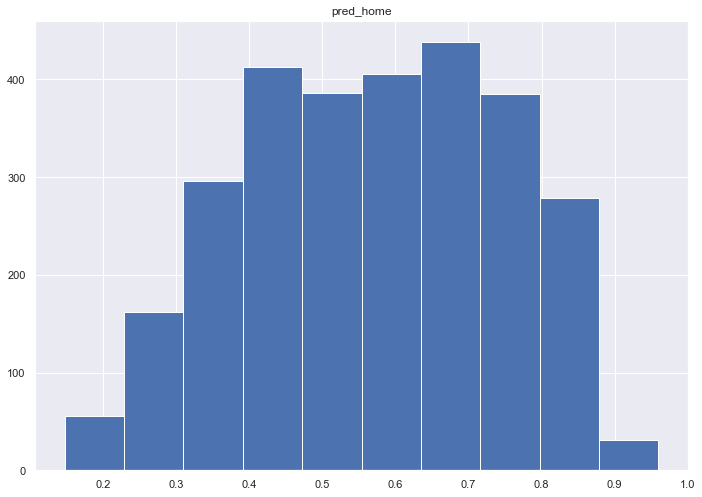

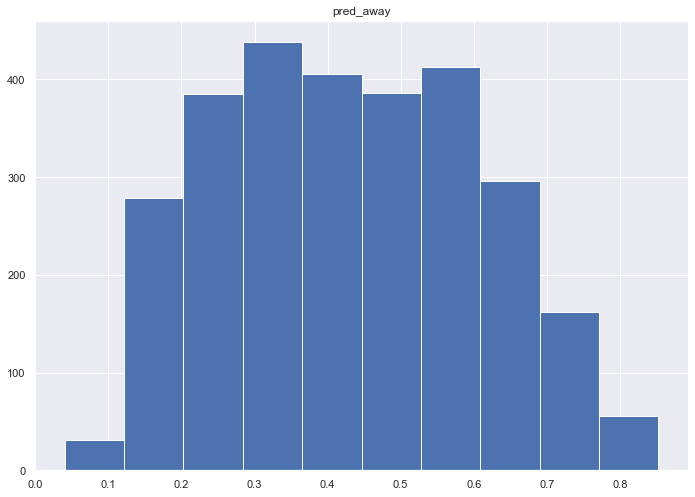

In [379]:
data.hist(column='pred_home')
data.hist(column='pred_away')

In [380]:
#data['pred_home_t'] = np.where(data['pred_home']> 0.5, data['pred_home'], 0.0)
#data['pred_away_t'] = np.where(data['pred_away']> 0.5, data['pred_away'], 0.0)


In [381]:
data[['odds1_true', 'odds2_true']].astype(float)
data['odds1_true_02'] = pd.to_numeric(data['odds1_true'],errors='coerce') + 0.02
data['odds2_true_02'] = pd.to_numeric(data['odds2_true'],errors='coerce') + 0.02

<ipython-input-381-69b6b93bf76c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['odds1_true_02'] = pd.to_numeric(data['odds1_true'],errors='coerce') + 0.02
<ipython-input-381-69b6b93bf76c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['odds2_true_02'] = pd.to_numeric(data['odds2_true'],errors='coerce') + 0.02


In [382]:
data

,,,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,pred_away,Results,odds1_true_02,odds2_true_02
GAME_DATE,HOME,AWAY,,,,,,,,,,,
2017-03-11,LAC,PHI,112:100,1.06,11.06,1.033812,0.943396,0.090416,0.756017,0.243983,1.0,0.963396,0.110416
2015-12-10,CHI,LAC,83:80,2.03,1.84,1.036089,0.492611,0.543478,0.405307,0.594693,1.0,0.512611,0.563478
2010-02-18,CLE,DEN,116:118,1.33,3.44,1.042577,0.751880,0.290698,0.766933,0.233067,0.0,0.771880,0.310698
2011-02-10,BOS,LAL,86:92,1.74,2.14,1.042002,0.574713,0.467290,0.486568,0.513432,0.0,0.594713,0.487290
2012-03-23,ATL,BKN,93:84,1.31,3.58,1.042688,0.763359,0.279330,0.535724,0.464276,1.0,0.783359,0.299330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-20,UTA,SAS,102:106,2.19,1.71,1.041416,0.456621,0.584795,0.396541,0.603459,0.0,0.476621,0.604795
2018-03-01,SAC,BKN,116:111,2.19,1.72,1.038016,0.456621,0.581395,0.613979,0.386021,1.0,0.476621,0.601395
2013-01-11,NYK,CHI,101:108,1.55,2.54,1.038862,0.645161,0.393701,0.685122,0.314878,0.0,0.665161,0.413701


In [383]:
def roi1h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home'] >= 0.5 and df['pred_home'] <0.6:
            return df['Results'] * df['Odds1'] * 1 -1
def roi2h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home']> 0.6 and df['pred_home'] <=0.7:
            return df['Results'] * df['Odds1'] * 2 - 2
def roi3h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home']> 0.7:
            return df['Results'] * df['Odds1'] * 3 -3
def roi1a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']>= 0.5 and df['pred_away'] <0.6:
            return (1- df['Results']) * df['Odds2'] * 1 -1
def roi2a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']> 0.6 and df['pred_away'] <=0.7:
            return (1 - df['Results']) * df['Odds2'] * 2 -2
def roi3a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']> 0.7:
            return (1 - df['Results']) * df['Odds2'] * 3 -3

data['roi1h'] = data.apply(roi1h, axis=1)
data['roi2h'] = data.apply(roi2h, axis=1)
data['roi3h'] = data.apply(roi3h, axis=1)
data['roi1a'] = data.apply(roi1a, axis=1)
data['roi2a'] = data.apply(roi2a, axis=1)
data['roi3a'] = data.apply(roi3a, axis=1)
data['roi_total'] = data.fillna(0)['roi1h'] + data.fillna(0)['roi2h'] + data.fillna(0)['roi3h'] + data.fillna(0)['roi1a'] + data.fillna(0)['roi2a'] + data.fillna(0)['roi3a']
data['roi_total_cum'] = data['roi_total'].cumsum()
data

,,,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,pred_away,Results,odds1_true_02,odds2_true_02,roi1h,roi2h,roi3h,roi1a,roi2a,roi3a,roi_total,roi_total_cum
GAME_DATE,HOME,AWAY,,,,,,,,,,,,,,,,,,,
2017-03-11,LAC,PHI,112:100,1.06,11.06,1.033812,0.943396,0.090416,0.756017,0.243983,1.0,0.963396,0.110416,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2015-12-10,CHI,LAC,83:80,2.03,1.84,1.036089,0.492611,0.543478,0.405307,0.594693,1.0,0.512611,0.563478,NaN,NaN,NaN,-1.00,NaN,NaN,-1.00,-1.00
2010-02-18,CLE,DEN,116:118,1.33,3.44,1.042577,0.751880,0.290698,0.766933,0.233067,0.0,0.771880,0.310698,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-1.00
2011-02-10,BOS,LAL,86:92,1.74,2.14,1.042002,0.574713,0.467290,0.486568,0.513432,0.0,0.594713,0.487290,NaN,NaN,NaN,1.14,NaN,NaN,1.14,0.14
2012-03-23,ATL,BKN,93:84,1.31,3.58,1.042688,0.763359,0.279330,0.535724,0.464276,1.0,0.783359,0.299330,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-20,UTA,SAS,102:106,2.19,1.71,1.041416,0.456621,0.584795,0.396541,0.603459,0.0,0.476621,0.604795,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-41.64
2018-03-01,SAC,BKN,116:111,2.19,1.72,1.038016,0.456621,0.581395,0.613979,0.386021,1.0,0.476621,0.601395,NaN,2.38,NaN,NaN,NaN,NaN,2.38,-39.26
2013-01-11,NYK,CHI,101:108,1.55,2.54,1.038862,0.645161,0.393701,0.685122,0.314878,0.0,0.665161,0.413701,NaN,-2.00,NaN,NaN,NaN,NaN,-2.00,-41.26


In [384]:
data.reset_index(inplace=True)

In [385]:
import matplotlib.pyplot as plt

data['roi_total'] = data['roi_total'].replace(0, np.nan)
data['roi_total_cum'] = data['roi_total'].cumsum()
data['roi1h_cum'] = data['roi1h'].cumsum()
data['roi2h_cum'] = data['roi2h'].cumsum()
data['roi3h_cum'] = data['roi3h'].cumsum()
data['roi1a_cum'] = data['roi1a'].cumsum()
data['roi2a_cum'] = data['roi2a'].cumsum()
data['roi3a_cum'] = data['roi3a'].cumsum()
data_roi = data[['roi1h_cum','roi2h_cum','roi3h_cum','roi1a_cum','roi2a_cum','roi3a_cum','roi_total_cum','GAME_DATE']]
#data = data.sort_values(by='GAME_DATE')

data = data.sort_values(by='GAME_DATE', inplace=True)
data_roi.set_index('GAME_DATE', inplace=True)
#sns.lineplot(data = data_roi, x='GAME_DATE')
data_roi

,roi1h_cum,roi2h_cum,roi3h_cum,roi1a_cum,roi2a_cum,roi3a_cum,roi_total_cum
GAME_DATE,,,,,,,
2017-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-10,NaN,NaN,NaN,-1.00,NaN,NaN,-1.00
2010-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-10,NaN,NaN,NaN,0.14,NaN,NaN,0.14
2012-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2012-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,NaN,12.66,NaN,NaN,NaN,NaN,-39.26
2013-01-11,NaN,10.66,NaN,NaN,NaN,NaN,-41.26


<AxesSubplot:xlabel='GAME_DATE'>

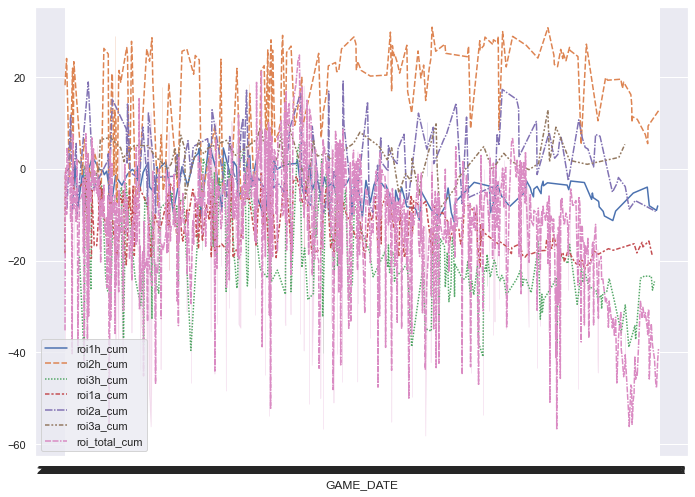

In [386]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = data_roi )